In [2]:
import math
import numpy as np
from datetime import datetime, timedelta, date
import time
import xarray as xr
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [2]:
def speedstats(dsspeed, percent=False):
    bins=list(range(0,int(dsspeed["speed"].max())+2))
    sg = dsspeed.groupby_bins("speed",bins)
    speedcounts = sg.count(...)["speed"]
    speedlabelsdict={}
    for k in sg.groups:
        speedlabelsdict[k.left]=k
    speedlabels=[]    
    for k in sorted(speedlabelsdict):
        speedlabels.append("%s"%speedlabelsdict[k])
    if percent:
        alldscount = dsspeed["speed"].count().item(0)
        speedcounts = speedcounts/alldscount
    return speedlabels, speedcounts

In [3]:
def directionstats(dsdir, percent=False):
    dirlabels = ["N","NE", "E", "SE", "S", "SW", "W", "NW"]
    dirgroup = dsdir.groupby("wind_dir_cat")
    dircounts = dirgroup.count(...)["wind_dir"]
    if percent:
        alldscount = dsdir["speed"].count().item(0)
        dircounts = dircounts/alldscount
    return dirlabels, dircounts

In [4]:
def wind_direction_disc(azim):
    wind_dir = np.ma.copy(azim)
    # wind_dir
    # wind_dir.shape, azim[1].size
    # wind_dir
    directiondict = {1: (337.5, 22.5), # N
                     2: (22.5, 67.5), # NE
                     3: (67.5, 112.5), # E
                     4: (112.5, 157.5), # SE
                     5: (157.5, 202.5), # S
                     6: (202.5, 247.5), # SW
                     7: (247.5, 292.5), # W
                     8: (292.5, 337.5)}  # NW
    for i in directiondict:
        if directiondict[i][0] > directiondict[i][1]:
            wind_dir[(~wind_dir.mask) & ((wind_dir > directiondict[i][0]) | (wind_dir <= directiondict[i][1]))] = i
        else:
            wind_dir[(~wind_dir.mask) & (wind_dir > directiondict[i][0]) & (wind_dir <= directiondict[i][1])] = i
    return wind_dir

In [3]:
ds = xr.load_dataset('/mnt/storageapplications/data/PERIFEREIA_Attikis/Fire/P2_Lavreotiki/Wind/Input/era5/p2_1979_1983.grib')

ValueError: PyNIO or cfgrib is required for accessing GRIB files

In [5]:
ds = xr.open_mfdataset("/home/sg/Projects/perifereia/jupyter_notebooks/reera5_20072011/*nc")

/home/sg/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  """Entry point for launching an IPython kernel.
/home/sg/.local/lib/python3.6/site-packages/xarray/backends/api.py:941: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,


In [27]:
ds

<xarray.Dataset>
Dimensions:       (expver: 2, latitude: 3, longitude: 3, time: 101023)
Coordinates:
  * longitude     (longitude) float32 23.42 23.67 23.92
  * latitude      (latitude) float32 37.92 37.67 37.42
  * expver        (expver) int32 1 5
  * time          (time) datetime64[ns] 2002-04-01 ... 2021-08-22T06:00:00
Data variables:
    u10           (time, latitude, longitude, expver) float32 dask.array<chunksize=(25680, 3, 3, 2), meta=np.ndarray>
    v10           (time, latitude, longitude, expver) float32 dask.array<chunksize=(25680, 3, 3, 2), meta=np.ndarray>
    fg10          (time, latitude, longitude, expver) float32 dask.array<chunksize=(25680, 3, 3, 2), meta=np.ndarray>
    i10fg         (time, latitude, longitude, expver) float32 dask.array<chunksize=(25680, 3, 3, 2), meta=np.ndarray>
    speed         (time, latitude, longitude, expver) float32 dask.array<chunksize=(25680, 3, 3, 2), meta=np.ndarray>
    wind_dir      (time, latitude, longitude, expver) float32 dask.array<chunksize=(25680, 3, 3, 2), meta=np.ndarray>
    wind_dir_cat  (time, latitude, longitude, expver) float32 1.0 1.0 ... nan
Attributes:
    Conventions:  CF-1.6
    history:      2021-08-30 16:25:45 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...

In [6]:
ds['speed'] = np.sqrt(ds.u10**2+ds.v10**2)
ds['wind_dir'] = 180 + (180 / math.pi) * np.arctan2(ds.u10, ds.v10)
ds['wind_dir_cat'] = xr.apply_ufunc(wind_direction_disc, ds['wind_dir'],dask = 'allowed')

/home/sg/.local/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()
/home/sg/.local/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in less_equal
  app.launch_new_instance()
/home/sg/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in greater
/home/sg/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in less_equal


In [7]:
dscell = ds.sel(latitude=slice(37.95,37.85), longitude=slice(23.85, 23.95))

<BarContainer object of 12 artists>

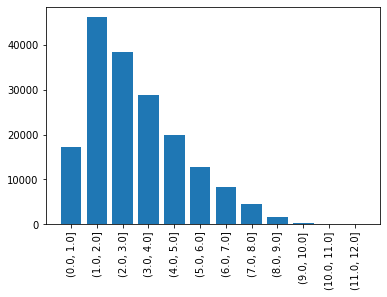

In [8]:
lab, speeds = speedstats(dscell)
plt.xticks(rotation=90)
plt.bar(lab,speeds)

<BarContainer object of 8 artists>

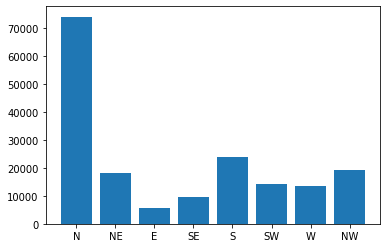

In [15]:
directions,dircounts = directionstats(dscell, percent=False)
plt.bar(directions,dircounts)

In [16]:
start="2010-01-01"
end="2020-12-31"
dstimerange=dscell.sel(time=slice(start, end))

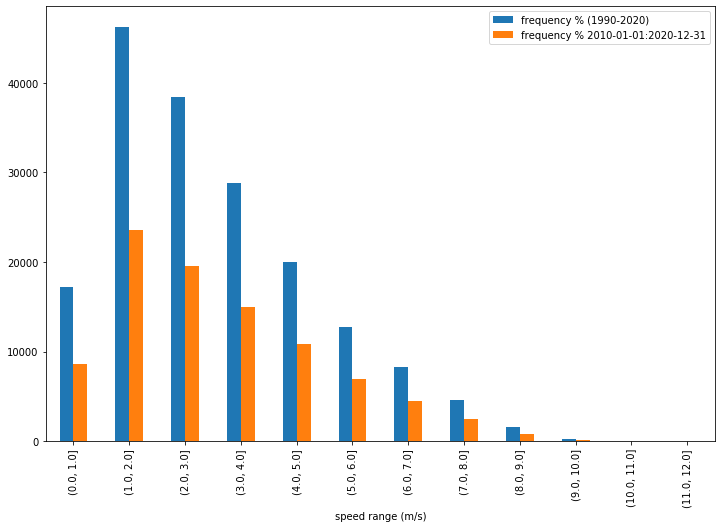

In [17]:
lab1, speeds1 = speedstats(dscell, percent=False)
lab2, speeds2 = speedstats(dstimerange, percent=False)
speeds2 = np.append(speeds2, np.zeros(len(speeds1)-len(speeds2), dtype=np.int8))
dfplt=pd.DataFrame({"speed range (m/s)":lab1, "frequency % (1990-2020)":speeds1, "frequency %% %s:%s"%(start,end):speeds2})
dfplt.plot.bar(x='speed range (m/s)',  figsize=(12,8), logy=False)

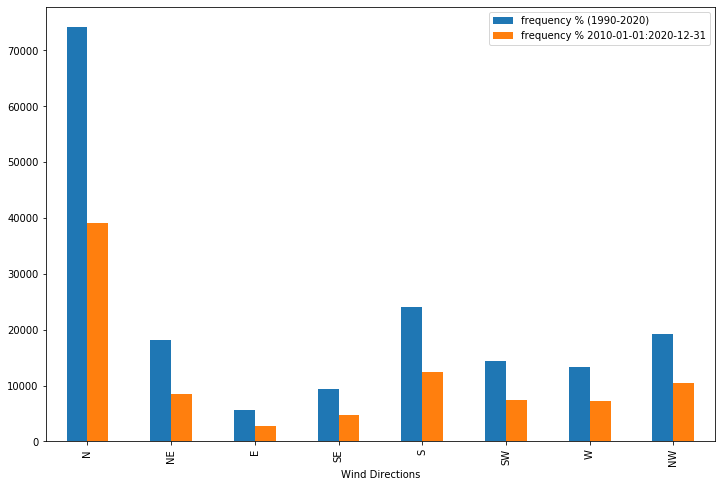

In [18]:
lab1, dirs1 = directionstats(dscell, percent=False)
lab2, dirs2 = directionstats(dstimerange, percent=False)
dfplt=pd.DataFrame({"Wind Directions":lab1, "frequency % (1990-2020)":dirs1, "frequency %% %s:%s"%(start,end):dirs2, })
dfplt.plot.bar(x="Wind Directions", figsize=(12,8))

In [19]:
dirlab=["N","NE", "E", "SE", "S", "SW", "W", "NW"]
allspeedlabels, allspeeds = speedstats(dscell, percent=False)
plotdata=[]
for i in range(1,len(dirlab)+1):
    onedirset=dscell.where(dscell.wind_dir_cat==i)
    l, dirspeeds = speedstats(onedirset, percent=False)
    dirspeeds = np.append(dirspeeds, np.zeros(len(allspeeds)-len(dirspeeds), dtype=np.int8))
    plotdata.append(dirspeeds)

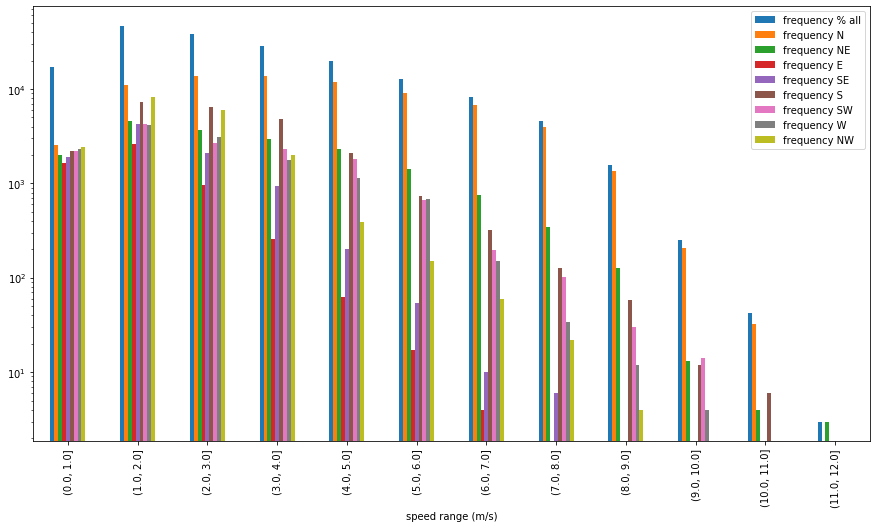

In [20]:
pddict={"speed range (m/s)":allspeedlabels, "frequency % all":allspeeds}
for i in range(0,len(dirlab)):
    pddict["frequency %s"%dirlab[i]]=plotdata[i]   
dfplt=pd.DataFrame(pddict)
dfplt.plot.bar(x='speed range (m/s)',  figsize=(15,8), logy=True)

In [24]:
dfplt

,speed range (m/s),frequency % all,frequency N,frequency NE,frequency E,frequency SE,frequency S,frequency SW,frequency W,frequency NW
0,"(0.0, 1.0]",17174,2520,1973,1640,1913,2192,2202,2313,2421
1,"(1.0, 2.0]",46213,10931,4619,2620,4210,7249,4292,4161,8131
2,"(2.0, 3.0]",38443,13570,3661,965,2087,6436,2703,3080,5941
3,"(3.0, 4.0]",28835,13754,2961,255,948,4856,2285,1762,2014
4,"(4.0, 5.0]",19958,11973,2299,63,202,2079,1809,1146,387
5,"(5.0, 6.0]",12709,9014,1405,17,54,728,661,680,150
6,"(6.0, 7.0]",8259,6764,756,4,10,317,198,151,59
7,"(7.0, 8.0]",4601,3968,341,0,6,128,102,34,22
8,"(8.0, 9.0]",1568,1336,128,0,0,58,30,12,4
9,"(9.0, 10.0]",249,206,13,0,0,12,14,4,0


In [11]:
dc1 = ds.sel(time='2012-08-01')

In [12]:
dc1.speed

<xarray.DataArray 'speed' (time: 24, latitude: 3, longitude: 3, expver: 2)>
dask.array<getitem, shape=(24, 3, 3, 2), dtype=float32, chunksize=(24, 3, 3, 2), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 23.42 23.67 23.92
  * latitude   (latitude) float32 37.92 37.67 37.42
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 2012-08-01 ... 2012-08-01T23:00:00

In [13]:
dc1['maxspeed'] = dc1['speed'].max(dim='step',skipna=True)

ValueError: 'step' not found in array dimensions ('time', 'latitude', 'longitude', 'expver')

In [14]:
dc1

<xarray.Dataset>
Dimensions:       (expver: 2, latitude: 3, longitude: 3, time: 24)
Coordinates:
  * longitude     (longitude) float32 23.42 23.67 23.92
  * latitude      (latitude) float32 37.92 37.67 37.42
  * expver        (expver) int32 1 5
  * time          (time) datetime64[ns] 2012-08-01 ... 2012-08-01T23:00:00
Data variables:
    u10           (time, latitude, longitude, expver) float32 dask.array<chunksize=(24, 3, 3, 2), meta=np.ndarray>
    v10           (time, latitude, longitude, expver) float32 dask.array<chunksize=(24, 3, 3, 2), meta=np.ndarray>
    fg10          (time, latitude, longitude, expver) float32 dask.array<chunksize=(24, 3, 3, 2), meta=np.ndarray>
    i10fg         (time, latitude, longitude, expver) float32 dask.array<chunksize=(24, 3, 3, 2), meta=np.ndarray>
    speed         (time, latitude, longitude, expver) float32 dask.array<chunksize=(24, 3, 3, 2), meta=np.ndarray>
    wind_dir      (time, latitude, longitude, expver) float32 dask.array<chunksize=(24, 3, 3, 2), meta=np.ndarray>
    wind_dir_cat  (time, latitude, longitude, expver) float32 1.0 1.0 ... 1.0
Attributes:
    Conventions:  CF-1.6
    history:      2021-08-30 16:25:45 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...